# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
#from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [3]:
#your code here
pdf = pd.read_csv("../data/postures_clean.csv");
pdf.info()
pdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38943 entries, 0 to 38942
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   38943 non-null  int64  
 1   User    38943 non-null  int64  
 2   X0      38943 non-null  float64
 3   Y0      38943 non-null  float64
 4   Z0      38943 non-null  float64
 5   X1      38943 non-null  float64
 6   Y1      38943 non-null  float64
 7   Z1      38943 non-null  float64
 8   X2      38943 non-null  float64
 9   Y2      38943 non-null  float64
 10  Z2      38943 non-null  float64
 11  X3      38943 non-null  float64
 12  Y3      38943 non-null  float64
 13  Z3      38943 non-null  float64
 14  X4      38943 non-null  float64
 15  Y4      38943 non-null  float64
 16  Z4      38943 non-null  float64
 17  X5      38943 non-null  float64
 18  Y5      38943 non-null  float64
 19  Z5      38943 non-null  float64
 20  X6      38943 non-null  float64
 21  Y6      38943 non-null  float64
 22

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


In [4]:
print('There are', pdf['User'].nunique(), 'unique user to use as the number of clusters')

There are 14 unique user to use as the number of clusters


<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [5]:
#your code here
pdfx = pd.DataFrame(pdf[pdf.columns[2:]])
km = KMeans(n_clusters=14, n_init=46, random_state=109)
pdfk = km.fit(pdfx)
pdfx['Cluster14'] = pd.DataFrame(pdfk.labels_)

(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [7]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_columns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"]
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

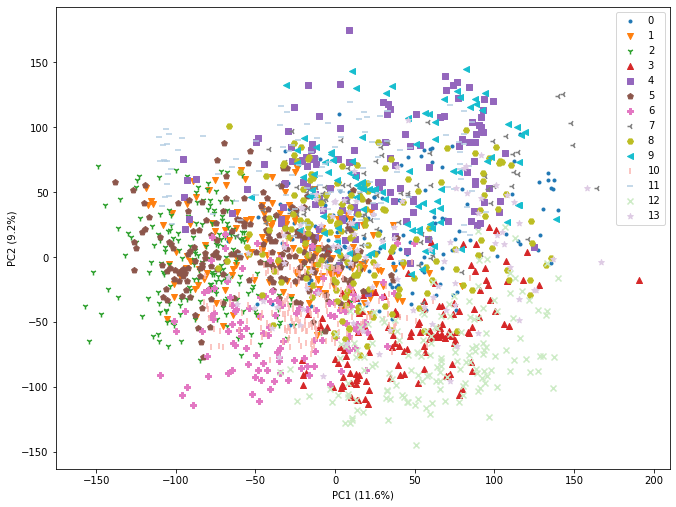

In [7]:
#your code here
plot_clusters(pdfx[pdfx.columns[:-1]], pdfx['Cluster14'], False)

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">The data is from te 14 users creating 5 postures with their hands in which the cordinates are based off of the postures and not the users. As a result, the same posture could be performed by different users and identifying each user based on the posture seems nearly impossible. What we may expect is to identify the users based on slight variations in the cordinates that are user specific. Moreover, this data is not related to the user and does not do a very good at identifying a particular user, therefore it's understandable that the plot above does not do a very good job of grouping the users well since the groups overlap with one another.</p>
<p style="text-indent: 25px;">Also, we see from the PC1 and PC2 that the information gathered in the first two principle components are relatively low, at around 21%, and so we should use additional measures and visuals to confirm the accuracy of the groupings.</p>
<p style="text-indent: 25px;"></p>
</font>

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 14, the average silhouette_score is 0.05859428326494809.


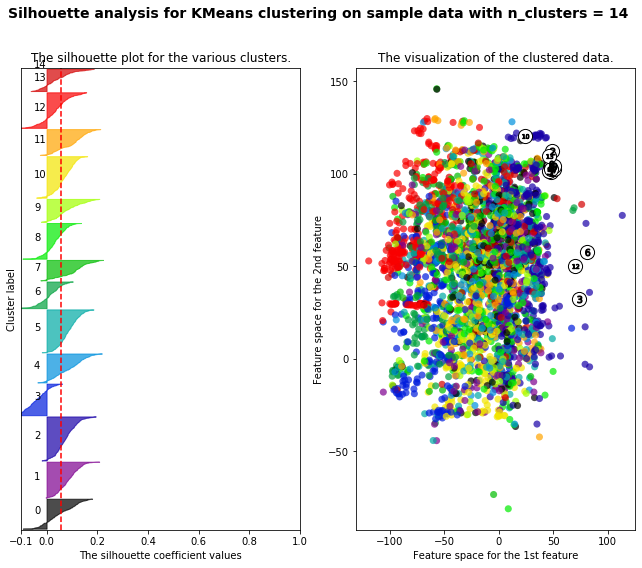

In [9]:
#your code here
pdfs = pdfx.sample(round(len(pdfx)*.1), random_state=109)
pdfs['Cluster14'].nunique()
silplot(pdfs[pdfs.columns[2:]].values, pdfs['Cluster14'], km, pointlabels=None)

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">Based on the scatterplot (the second plot) from the silplot function compared to the previous plot, we see a similar outcome of clusters that greatly overlap. In addition, `The visualization of the clustered data` plot shows that a majority of the cluster centers are very close to each other. From this plot, we can almost see 5 groups in the data with centers 3, 6, 10, 12, and the remaining points as another cluster. Although even these centers are relatively close to one another so the clusters may overlap as well from a charting perspective.</p>
<p style="text-indent: 25px;">The Silhouette plot shows that all the clusters are well below the 1 coefficeint value, which is reflected in the low silhouette score of 0.059, meaning that the clusters are not well separated from one another. We also see that one cluster has many of it's members closer to nearest cluster center compared to it's own cluster center. Additionally, serveral clusters also exhibit a sizable number of cluster members that are closer to nearest cluster center compared to it's own cluster center.</p>
<p style="text-indent: 25px;">As a result, using 14 clusters in the k-means model for this data is not generating well-defined clusters. We should consider using a different number for how many clusters are in the data.</p>
<p style="text-indent: 25px;"></p>
</font>

(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

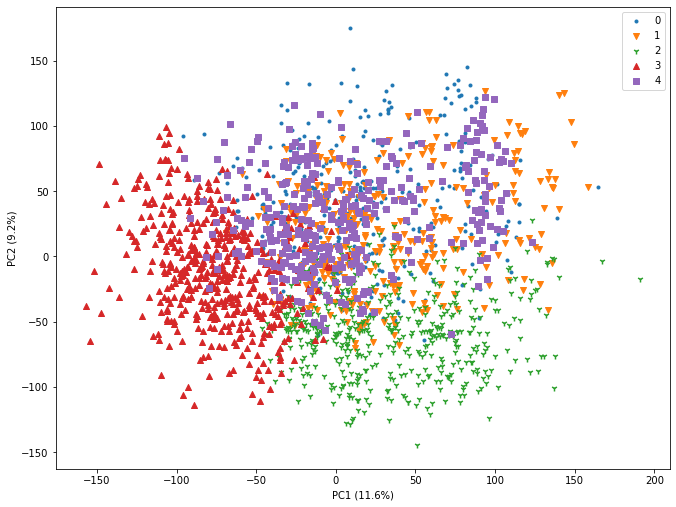

In [10]:
#your code here
#your code here
pdfx = pd.DataFrame(pdf[pdf.columns[2:]])
km = KMeans(n_clusters=5, n_init=46, random_state=109)
pdfk = km.fit(pdfx)
pdfx['Cluster5'] = pd.DataFrame(pdfk.labels_)

plot_clusters(pdfx[pdfx.columns[:-1]], pdfx['Cluster5'], False)

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">From the above plot we can see that using 5 clusters is a big improvement compared to using 14 clusters. The cluster at the left and the cluster at the bottom right seems to be better defined than previously. However, the other three clusters at the center to the top right are not well separeted. Again, the plot shows the cluster on the first two principle components with only 21% of the information in the data so we need additional metrics and visuals to get a better understanding of the fit.</p>
<p style="text-indent: 25px;"></p>
</font>

For n_clusters = 5, the average silhouette_score is 0.07516051986381592.


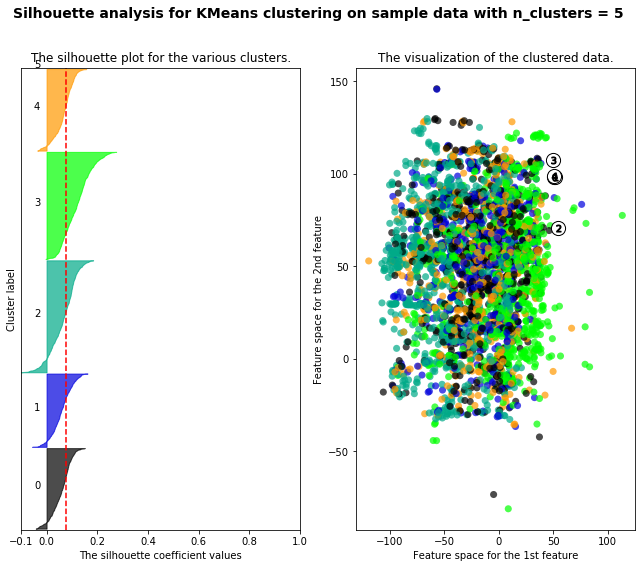

In [11]:
#your code here
pdfs = pdfx.sample(round(len(pdfx)*.1), random_state=109)

silplot(pdfs[pdfs.columns[2:]].values, pdfs['Cluster5'], km, pointlabels=None)

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">The silplot function using 5 clusters has a silhouette score of 0.075, which is slightly higher than that of 14 clusters. Although still considerably far from the silhouetter coeficient valus of 1, the vast majority of cluster members are closer to their own cluster centers compared to the center of the nearest cluster center. This shows that some evidence for using 5 clusters for this data.</p>
<p style="text-indent: 25px;">The scatter plot of the first two features shows us that three of the cluster centers are located in the same area. This scatterplot and the `plot_clusters` plot of 5 clusters demonstrates that there may be two postures that may be quite different from the others and remaining three postures that may be very similar to one another, such as the pointer 1 and 2 postures. This may be why these methods are not successfully identifying all five postures clearly.</p>
<p style="text-indent: 25px;"></p>
</font>

(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">Since we know that there are 5 postures in the data and the cordinates are describing the underlying postures it does make sense that we see an improvement when using 5 clusters versus 14. Although we know there are 5 postures we do not know how different the postures are from one another. From the results of the plots there may be 5 postures but three distinct postures. As a result, the best fit may be that of 3 clusters.</p>
<p style="text-indent: 25px;"></p>
</font>

<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

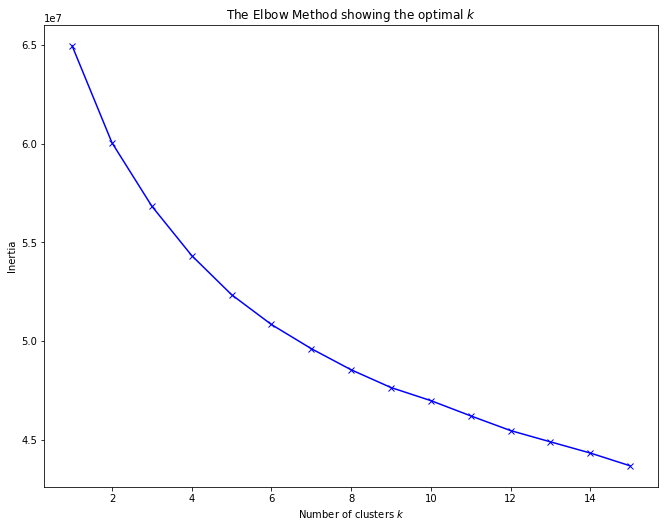

In [5]:
#your code here
pdfs = pd.DataFrame(pdf[pdf.columns[2:]]).sample(2000, random_state=109)

wss = []
for i in range(1,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(pdfs)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

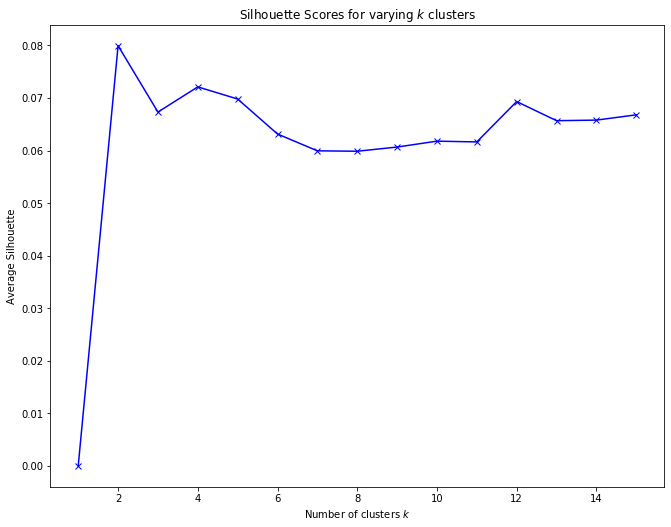

In [9]:
#your code here
scores = [0]
for i in range(2,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(pdfs)
    score = silhouette_score(pdfs, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for varying $k$ clusters')
plt.show()

(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

In [10]:
#your code here
gs_obj = OptimalK(n_jobs=1)

np.random.seed(109)

n_clusters = gs_obj(pdfs.values, n_refs=50, cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  14


In [11]:
gs_obj.gap_df

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,1.025205,1.161181e+08,784776.795143,0.004375,1.172762e+08,-0.034360,1.172581e+08
1,2.0,1.065051,1.141719e+08,945703.116751,0.005485,1.153119e+08,-0.021862,1.152929e+08
2,3.0,1.091091,1.124376e+08,700339.443641,0.004179,1.135586e+08,-0.017320,1.135491e+08
3,4.0,1.112739,1.114741e+08,712105.596345,0.004328,1.125857e+08,-0.016068,1.125804e+08
4,5.0,1.133704,1.108881e+08,792939.701784,0.004897,1.119944e+08,-0.008873,1.119858e+08
5,6.0,1.147450,1.100340e+08,776580.318088,0.004873,1.111316e+08,0.005655,1.111163e+08
6,7.0,1.146551,1.085067e+08,747391.385209,0.004756,1.095890e+08,-0.010338,1.095861e+08
7,8.0,1.161983,1.081804e+08,793547.320242,0.005094,1.092598e+08,-0.009124,1.092529e+08
8,9.0,1.175457,1.075675e+08,670165.818189,0.004350,1.086400e+08,0.000221,1.086328e+08
9,10.0,1.179658,1.068380e+08,675586.146564,0.004422,1.079032e+08,0.004745,1.078958e+08


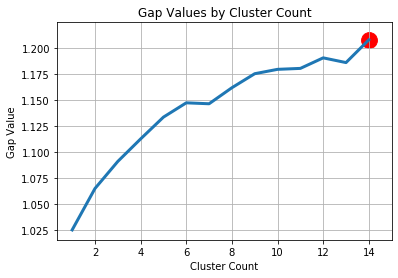

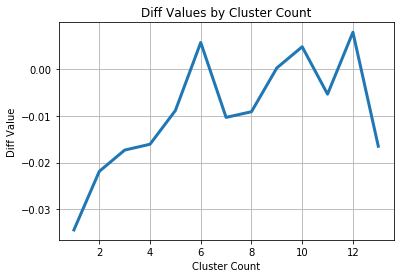

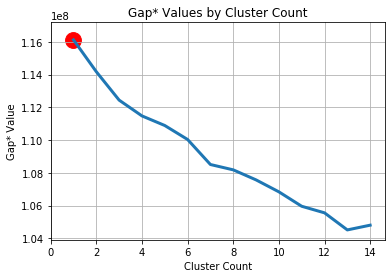

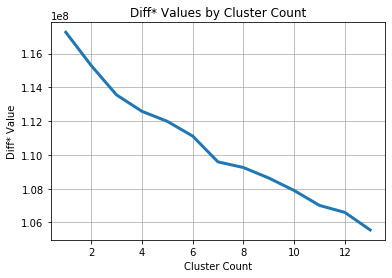

In [12]:
gs_obj.plot_results() # makes nice plots

In [13]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()

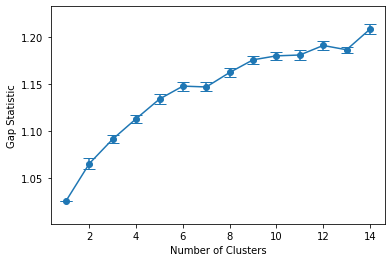

In [14]:
display_gapstat_with_errbars(gs_obj.gap_df)

(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">The Elbow Method plot show the inertia, which measures the total squared distance from points to their cluster's centroid, by the different number of clusters where the optimal number would show up in a sharp bend in the curve. In the plot we don't see a clear elbow in the line, although if pressed I would say at 2 clusters there may be a slight elbow. Also, we see the largest improvement in the inertia measure at 2 clusters and then the inertia improves at a decreasing rate, which is likely overfitting the data as the number of clusters increase.</p>
<p style="text-indent: 25px;">The plot of the silhouette scores, measuring how close its data points are to each other within it's own cluster compared to nearby clusters, at the different number of clusters shows that the highest score is at 2 clusters. This result bolsters the results from the elbow plot. Based on these two plots the data appears to have 2 clusters.</p>
<p style="text-indent: 25px;">The gap statistic plot, which detects whether the data clustered into K groups is significantly better than data generated at random, with error bars shows that optimal number of clusters is at 6 clusters. This is based on the first highest gap statistic where the lower level of the error bar is higher higher than the upper level of the error bar. At 7 clusters the gap statistics is at the same level as at 6, therefore we stop here and conclude from the gap statistic that 6 clusters is the optimal level.</p>
<p style="text-indent: 25px;">At this point we have a few methods that point to 2 clusters and one where there are 6 clusters. Since the first two plots do not show evidence for 6 clusters I'm inclined to choose 2 clusters at this point.</p>
<p style="text-indent: 25px;"></p>
</font>

<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

In [15]:
#your code here
from sklearn.neighbors import NearestNeighbors

# x-axis is each individual data point, numbered by an artificial index
# y-axis is the distance to its 2nd closest neighbor
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

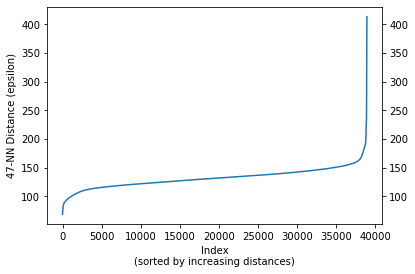

In [20]:
plot_epsilon(pdf[pdf.columns[2:]], len(pdf.columns[2:])*2)

In [21]:
pdfx = pd.DataFrame(pdf[pdf.columns[2:]])

fitted_dbscan = DBSCAN(eps=160).fit(pdfx)
pdfx['Label'] = pd.DataFrame(fitted_dbscan.labels_)

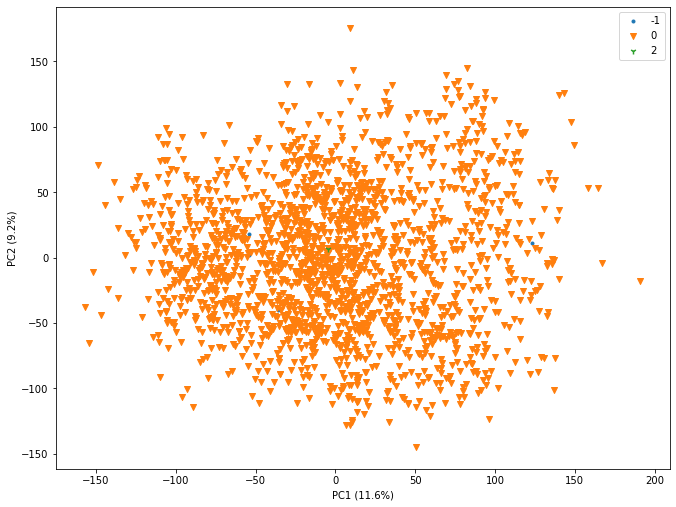

In [22]:
plot_clusters(pdfx[pdfx.columns[:-1]], pdfx['Label'], False)

In [23]:
silhouette_score(pdfx[pdfx.columns[:-1]][pdfx.Label != -1], pdfx['Label'][pdfx.Label != -1])

0.06463493561685353

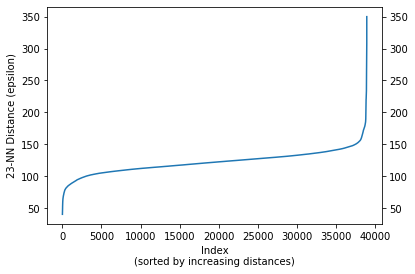

In [16]:
plot_epsilon(pdf[pdf.columns[2:]], len(pdf.columns[2:]))

In [18]:
pdfx = pd.DataFrame(pdf[pdf.columns[2:]])

fitted_dbscan = DBSCAN(eps=150).fit(pdfx)
pdfx['Label'] = pd.DataFrame(fitted_dbscan.labels_)

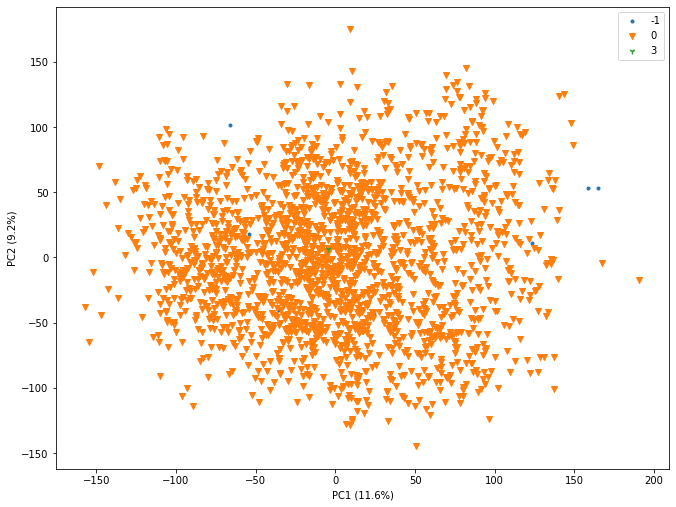

In [19]:
plot_clusters(pdfx[pdfx.columns[:-1]], pdfx['Label'], False)

In [20]:
silhouette_score(pdfx[pdfx.columns[:-1]][pdfx.Label != -1], pdfx['Label'][pdfx.Label != -1])

0.04893404517353868

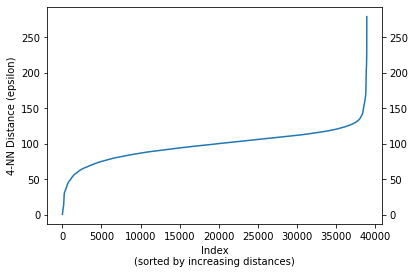

In [29]:
plot_epsilon(pdf[pdf.columns[2:]], 5)

In [25]:
pdfx = pd.DataFrame(pdf[pdf.columns[2:]])

fitted_dbscan = DBSCAN(eps=135).fit(pdfx)
pdfx['Label'] = pd.DataFrame(fitted_dbscan.labels_)

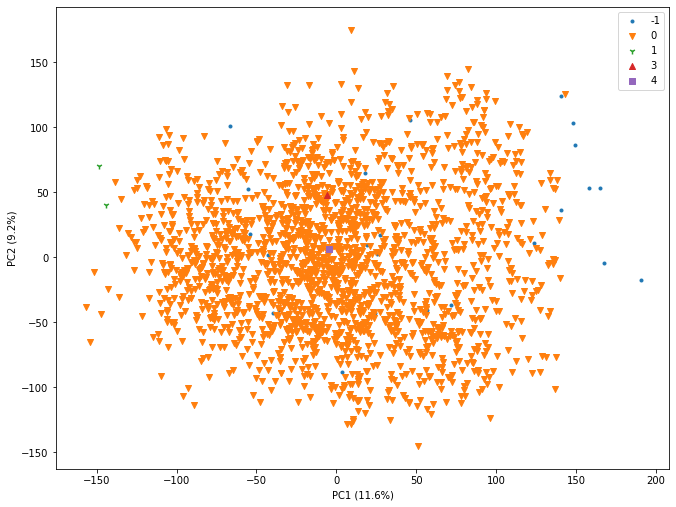

In [26]:
plot_clusters(pdfx[pdfx.columns[:-1]], pdfx['Label'], False)

In [27]:
silhouette_score(pdfx[pdfx.columns[:-1]][pdfx.Label != -1], pdfx['Label'][pdfx.Label != -1])

0.027802087730093628

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">Prior to running the `DBSCAN` function I used the `plot_epsilon` function with `min-samples=48`, which is the number of features times two (24 x 2). From the epsilon plot we see that the curve accelerates at around 160, which is used in the DBSCAN function to find the number clusters in the data.</p>
<p style="text-indent: 25px;">We see from the `plot_cluster` plot of the DBSCAN results that there are two clusters. The plot shows that nearly all the points are grouped as one cluster and the remaining few points are either ignored and not clustered or for what seems to be one point is a cluster itself. These results look suspect and I would like to see what the silhouette plot of two clusters generates. In addition, the DBSCAN cluster results produces a silhouette score of 0.065, which is a score between the 14 and 5 clusters from the k-means results. While the score appears to be in line with the other models the scatterplot shows that there is essentially 1 cluster. As a result, I conclude that DBSCAN was not able to find multiple clusters in the data.</p>
<p style="text-indent: 25px;"></p>
</font>

(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

In [ ]:
#your code here
dist_mat = pdist(pd.DataFrame(pdf[pdf.columns[2:]]), metric="euclidean")
ward_data = hac.ward(dist_mat)

In [ ]:
plt.figure(figsize=(11,8.5))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
hac.dendrogram(ward_data)
plt.show()

In [ ]:
#your code here
from scipy.cluster.hierarchy import fcluster

In [ ]:
hac_labels = hac.fcluster(ward_data, t=8000, criterion='distance')

silhouette_score(pdf[pdf.columns[2:]], hac_labels)

In [ ]:
plot_clusters(pdf[pdf.columns[2:]], hac_labels, False)

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">In the final alternative algorithms for clustering I used the agglomerative clustering above, using Ward’s method, and the dendrogram shows that there may be 5 clusters in the data. We see that points cluster together relatively quickly up until a distance of 6,500 and then the 5 clusters persist until the distance of 9,500. Based on the dendrogram, this is evidence that there are 5 different clusters in the data which take time/distance to cluster in to 4 or less clusters. I was expecting a silhouette score that would be much higher than what we have seem thus far, however the score from Hierarchical clustering is the lowest at 0.052. Nevertheless, based on Hierarchical clustering we see that there are 5 clusters.</p>
<p style="text-indent: 25px;"></p>
</font>

(g) Overall, what do you conclude about the number and kind of clusters in this data set?

your response here<br />
<font color='blue'>
<p style="text-indent: 25px;"></p>
<p style="text-indent: 25px;">The different algorithms used different methods of distances to cluster the data into groups with mixed results. The data was challenging to work with in terms of visualizing the clusters. Even using plots with the first two principle components, which accounted for only 21% of the variation of the data, made it somewhat difficult to determine whether the clusters were accuartely assigned.</p>
<p style="text-indent: 25px;">Using the silhouette score and the additional plots for the different algorithms then I would conclude that the k-means algorithm with 5 clusters was best. It had the highest silhouette score of 0.075 and the silhouette plot showed well formed clusters with fewer points that may be assigned to a nearby cluster. Although the hierarchical clustering had the lowest silhouette score it shows some evidence for 5 clusters as well, due to the height of the clustering from 5 to 4 clusters.</p>
<p style="text-indent: 25px;">One can make an arguement for including the user as a feature in the clustering of the postures since the cordinate system may be influenced by the users hand size. This may have affected how well the cordinates represent the same posture if there were variations within cordinates of the same posture. This may be an example of additional information that may not be available that can make clustering the data challenging.</p>
<p style="text-indent: 25px;"></p>
</font>